In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
# define DF
df = pd.read_csv('Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)
df


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [45]:

print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  C

In [ ]:
#Converting 'Created Date' and 'Closed Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df


In [47]:
irrelevant_columns = [
 'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 
    'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Park Facility Name', 
    'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 
    'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 
    'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 
    'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 
    'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 
    'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date', 
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
 ]
df = df.drop(columns=irrelevant_columns)
print(df.columns)


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')


In [48]:

df.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

In [49]:
df=df.dropna()


In [50]:
df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

In [51]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique()[:5]) 
    print(f"Number of unique values: {df[col].nunique()}")

Column: Unique Key
[32310363 32309934 32309159 32305098 32306529]
Number of unique values: 291107
Column: Created Date
<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58']
Length: 5, dtype: datetime64[ns]
Number of unique values: 251970
Column: Closed Date
<DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00']
Length: 5, dtype: datetime64[ns]
Number of unique values: 231991
Column: Agency
['NYPD']
Number of unique values: 1
Column: Complaint Type
['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial']
Number of unique values: 15
Column: Descriptor
['Loud Music/Party' 'No Access' 'Commercial Overnight Parking'
 'Blocked Sidewalk' 'Posted Parking Sign Violation']
Number of unique values: 41
Column: Location Type
['Street/Sidewalk' 'Club/Bar/Restaurant' 'Store/Commercial'
 'House of W

In [52]:
# To show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        print("\nColumn:", col)
        print("Sum:", df[col].sum())
        print("Mean:", df[col].mean())
        print("Std Dev:", df[col].std())
        print("Skewness:", skew(df[col]))
        print("Kurtosis:", kurtosis(df[col]))


Column: Unique Key
Sum: 9112107955295
Mean: 31301576.242738925
Std Dev: 575377.7387071877
Skewness: 0.01689763535252478
Kurtosis: -1.1765930578972625

Column: Incident Zip
Sum: 3160833212.0
Mean: 10857.977348535074
Std Dev: 580.2807740122854
Skewness: -2.55394273823088
Kurtosis: 37.82710691716598

Column: Latitude
Sum: 11855530.75877829
Mean: 40.72568079358549
Std Dev: 0.08241087015112669
Skewness: 0.12311374825695312
Kurtosis: -0.7348262446375284

Column: Longitude
Sum: -21520095.167681944
Mean: -73.92503501352404
Std Dev: 0.07865355626291953
Skewness: -0.3127370305828404
Kurtosis: 1.4555548469099504


In [53]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Unique Key,Incident Zip,Latitude,Longitude
Unique Key,1.000000,0.025492,-0.032613,-0.008621
Incident Zip,0.025492,1.000000,-0.499081,0.385934
Latitude,-0.032613,-0.499081,1.000000,0.368819
Longitude,-0.008621,0.385934,0.368819,1.000000


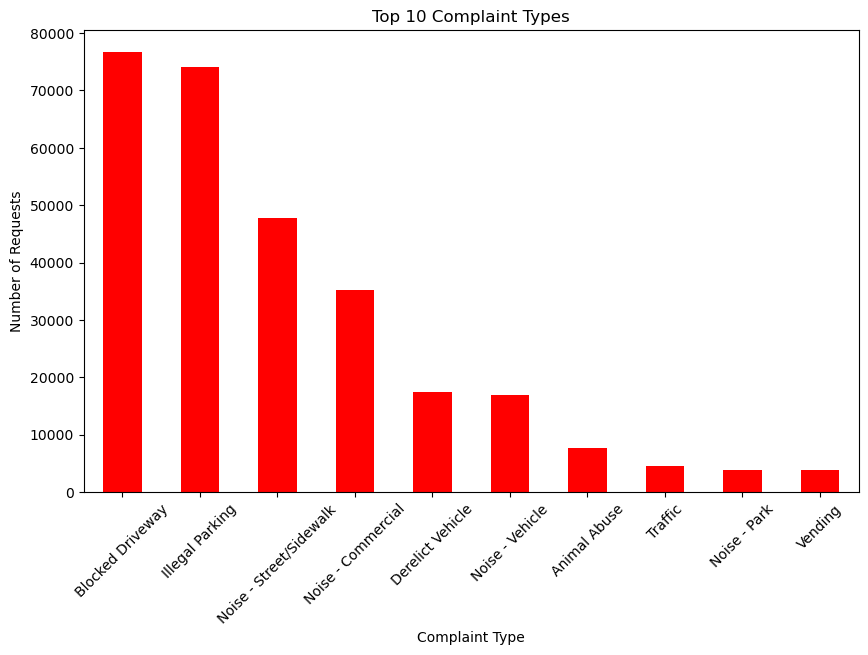

In [54]:
import matplotlib.pyplot as plt


# Get the top 10 most frequent complaint types
top_complaints = df['Complaint Type'].value_counts().head(10)
# Set the size of the plot
plt.figure(figsize=(10,6))
# Create a bar chart of the top 10 complaint types
top_complaints.plot(kind='bar', color='red')
# Add a title to the plot
plt.title('Top 10 Complaint Types')
# Label the x-axis
plt.xlabel('Complaint Type')
# Label the y-axis
plt.ylabel('Number of Requests')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout to prevent overlap

# Display the plot
plt.show()

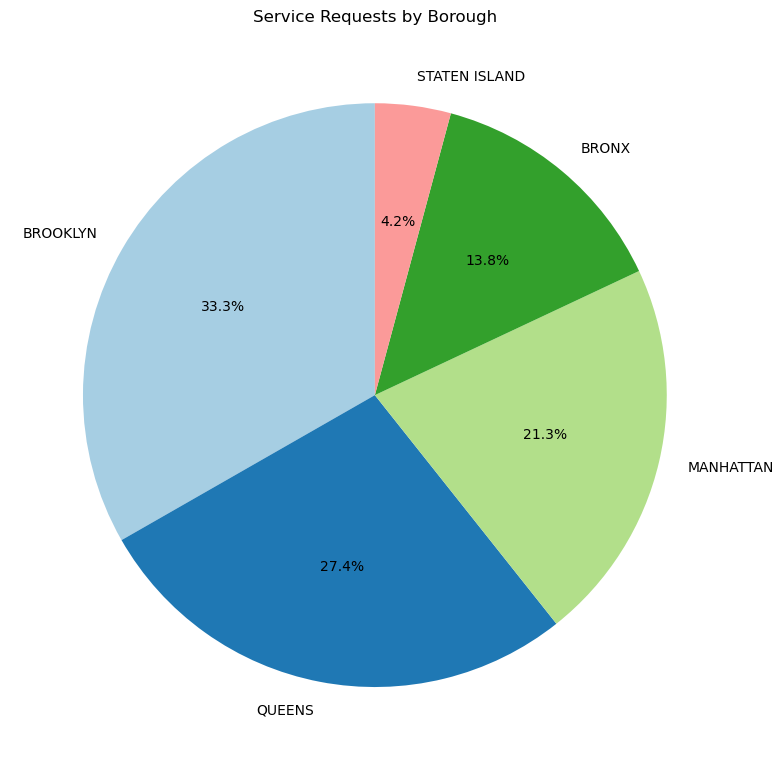

In [55]:
# Count the number of service requests per borough
borough_counts = df['Borough'].value_counts()

# Set the size of the plot
plt.figure(figsize=(8, 8))

# Create a pie chart with labels and percentages
borough_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Service Requests by Borough')

# Remove y-axis label (not needed for pie chart)
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()

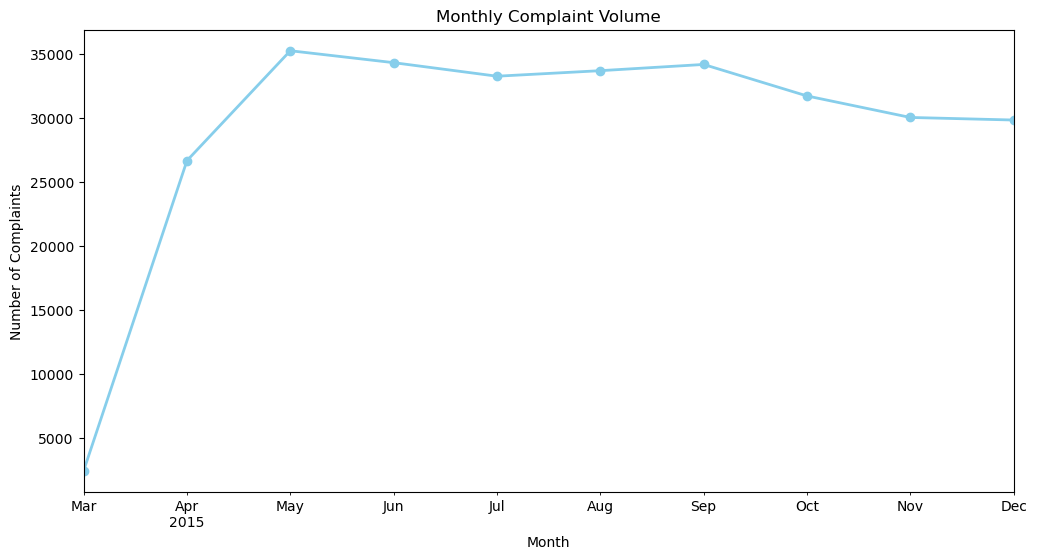

In [56]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Line plot of monthly complaint volume
df.set_index('Created Date').resample('ME').size().plot(
    kind='line',
    color='skyblue',
    marker='o',  # Optional: adds dots on data points
    linewidth=2
)

# Add labels and title
plt.title('Monthly Complaint Volume')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()


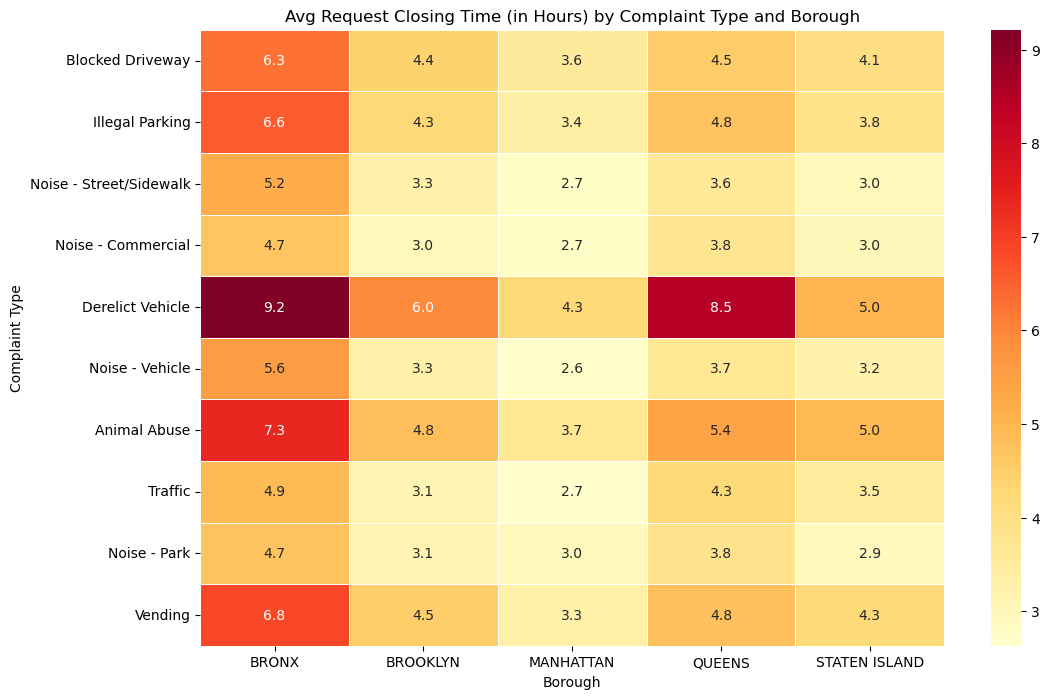

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute request closing time in hours
df['Request_Closing_Time'] = (
    pd.to_datetime(df['Closed Date']) - pd.to_datetime(df['Created Date'])
).dt.total_seconds() / 3600

# Create pivot table: complaint type vs borough, values = avg closing time
heatmap_data = df.pivot_table(
    index='Complaint Type',
    columns='Borough',
    values='Request_Closing_Time',
    aggfunc='mean'
)

# Filter to top 10 most frequent complaint types
top_complaints = df['Complaint Type'].value_counts().head(10).index
heatmap_data = heatmap_data.loc[top_complaints]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlOrRd', linewidths=0.5)

# Add titles and axis labels
plt.title('Avg Request Closing Time (in Hours) by Complaint Type and Borough')
plt.xlabel('Borough')
plt.ylabel('Complaint Type')

# Show plot without tight_layout
plt.show()


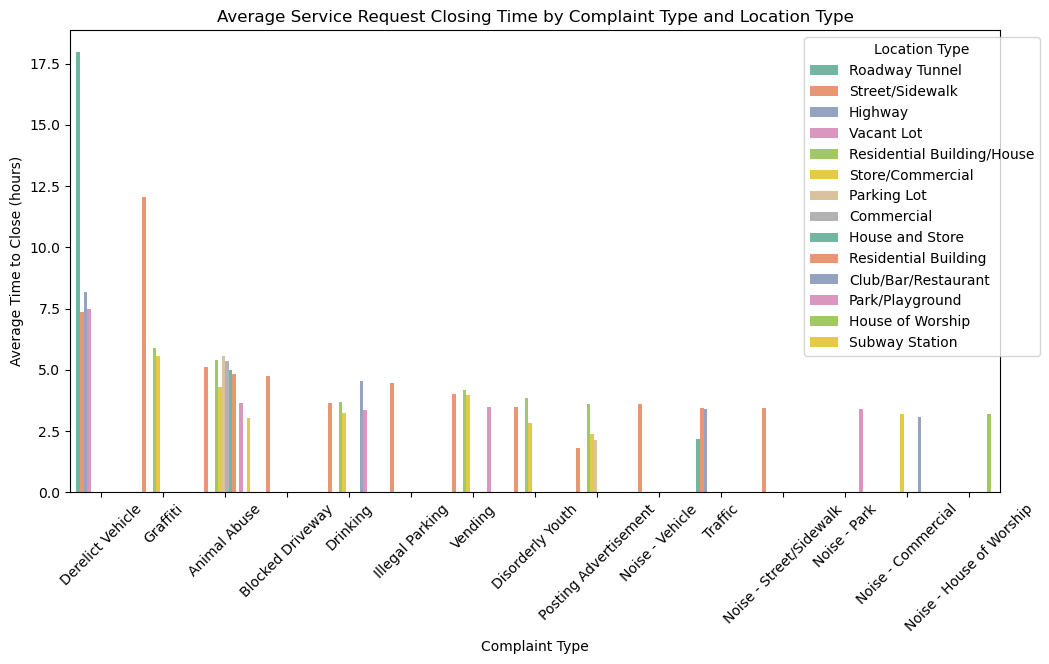

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Complaint Type and Location Type
avg_times = df.groupby(['Complaint Type', 'Location Type'])['Request_Closing_Time'].mean().reset_index()

# Sort by average closing time
avg_times = avg_times.sort_values('Request_Closing_Time', ascending=False)

# Get top 8 most frequent complaint types
top_complaints = df['Complaint Type'].value_counts().index

# Filter for top complaints
filtered_data = avg_times[avg_times['Complaint Type'].isin(top_complaints)]

# Plotting with vertical bars
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data,
            x='Complaint Type',  # Complaint types along the x-axis
            y='Request_Closing_Time',  # Average closing time along the y-axis
            hue='Location Type',  # Color bars based on Location Type
            palette='Set2')

# Adding titles and labels
plt.title('Average Service Request Closing Time by Complaint Type and Location Type')
plt.xlabel('Complaint Type')
plt.ylabel('Average Time to Close (hours)')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1))

# Display the plot
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Get the top 5 complaint types
top_complaint_types = df['Complaint Type'].value_counts().head(5).index

# Create a list of closing time groups (in hours) for each complaint type
groups = [
    df[df['Complaint Type'] == complaint]['Request_Closing_Time']
    for complaint in top_complaint_types
]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(*groups)

# Output results
print("ANOVA Test for Average Closing Time by Complaint Type")
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("Result: Reject the Null Hypothesis (H₀) - There is a significant difference in response times.")
else:
    print("Result: Fail to Reject the Null Hypothesis (H₀) - Response times are similar.")


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Complaint Type'], df['Location Type'])

# Perform Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test for Complaint Type and Location Type")
print("Chi2 Statistic:", chi2_stat)
print("P-Value:", p_val)

# Interpret the result
if p_val < 0.05:
    print("Result: Reject the Null Hypothesis (H₀) - Complaint type and Location Type are related.")
else:
    print("Result: Fail to Reject the Null Hypothesis (H₀) - No significant relationship.")